# Sentiment Classifier on IMDB dataset using Conv-net
<span style="color:red;">Aims:</span><br>
    1-Understanding NLP concept</br>
    2-Understanding of Word2Vec Concept<br>
    3-Understanding of Embedding,SpatialDropout1D, Conv1D, GlobalMaxPooling1D Layers<br>
    4-Understanding of 'Area under the curve'<br>
    5-Learn to work with ModelCheckpoint<br>

### Loading Dependencies

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding
from keras.layers import SpatialDropout1D, Conv1D, GlobalMaxPooling1D 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


### Loading Dataset

In [2]:
n_unique_words = 5000
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

### Working with Data

In [3]:
max_review_length = 400
pad_type = trunc_type = 'pre'
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

### Creating the model

In [4]:
model = Sequential()
model.add(Embedding(n_unique_words, 64, input_length=max_review_length)) 
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(256, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total para

### Configure model

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Checkpoints

In [6]:
output_dir = 'model_output/Sent-Conv/'
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

### Training the model

In [7]:
model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 146s 6ms/step - loss: 0.4892 - acc: 0.7458 - val_loss: 0.2960 - val_acc: 0.8759
Epoch 2/5
25000/25000 [==============================] - 156s 6ms/step - loss: 0.2541 - acc: 0.8963 - val_loss: 0.2583 - val_acc: 0.8913
Epoch 3/5
25000/25000 [==============================] - 146s 6ms/step - loss: 0.1715 - acc: 0.9366 - val_loss: 0.2568 - val_acc: 0.8964
Epoch 4/5
25000/25000 [==============================] - 155s 6ms/step - loss: 0.1143 - acc: 0.9609 - val_loss: 0.2793 - val_acc: 0.8926
Epoch 5/5
25000/25000 [==============================] - 145s 6ms/step - loss: 0.0700 - acc: 0.9784 - val_loss: 0.3337 - val_acc: 0.8881


### Model Evaluation

In [11]:
model.load_weights(output_dir+"weights.03.hdf5")
y_hat = model.predict_proba(x_valid)

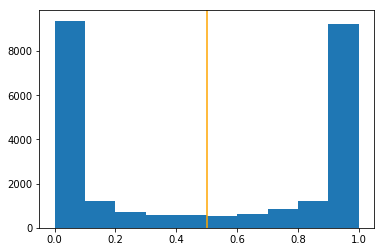

In [12]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [13]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'96.14'